### NYU Computational Physics 2019: Homework 3

Problems 7.2 and 7.9 from Newman textbook

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("dark")
#sns.set()

#sns.set_style("ticks")

In [312]:
sns.set(style='white', palette='colorblind', font='sans-serif', font_scale=1.2, 
        rc={"xtick.bottom" : True, "ytick.left" : True})

In [9]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)



In [10]:
sun_data = np.loadtxt("data/sunspots.txt")

In [11]:
fourier = DFT_slow(sun_data[:,1])
#fourier2 = dft(sun_data[:,1])
#fourier2 = np.fft.fft(sun_data[:,1])

In [21]:
N_samples = fourier.shape[0]
print(N_samples)

3143


#### 7.2 a)  Plot the sunspot count as a function of months. Mark off the length of one cycle.

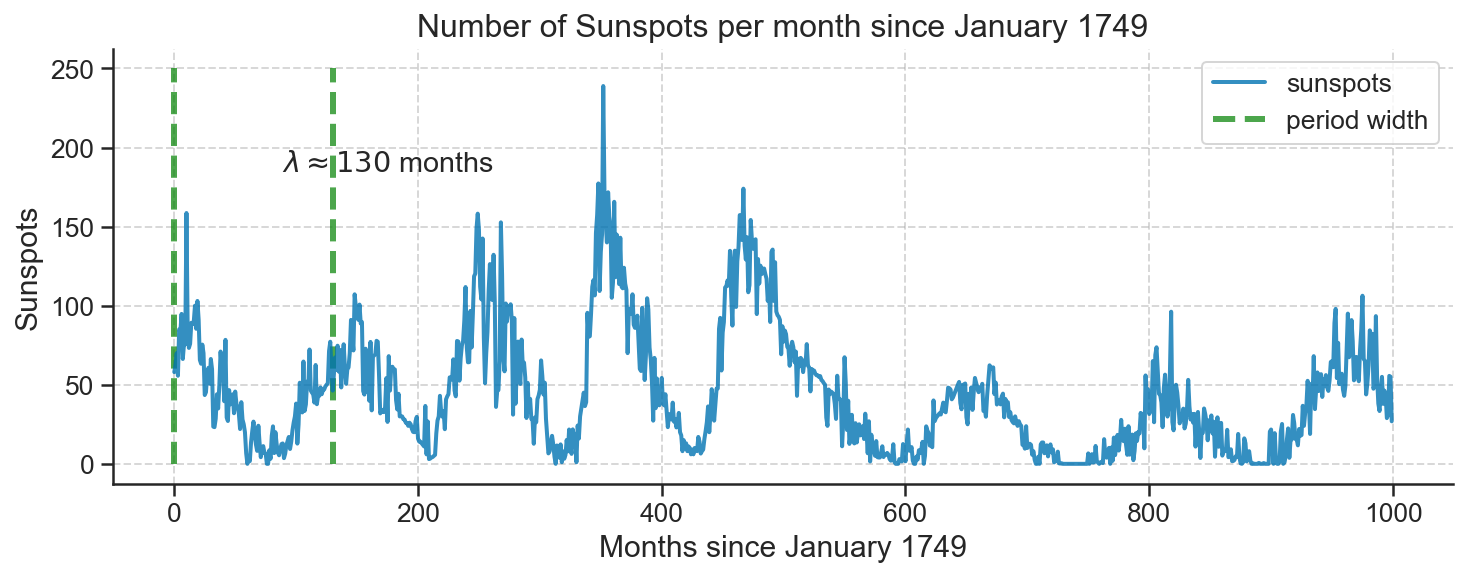

In [380]:
fig = plt.figure(figsize=(12,4))

plt.grid(color='gray', linestyle='--', linewidth=1, alpha = 0.3)
plt.plot(sun_data[:1000,0], sun_data[:1000,1], label = 'sunspots', linewidth = 2, alpha =0.8)
plt.vlines([0,130], 0, 250, color = 'green', linewidth = 3, alpha = 0.7, label = 'period width', linestyle = "--")
#plt.axvline(0, 0,250, color = 'red')
sns.despine()
plt.xlabel("Months since January 1749", fontsize = 15)
plt.ylabel("Sunspots", fontsize = 15)
plt.title("Number of Sunspots per month since January 1749", fontsize = 16)
plt.text(x = 88, y = 185, s=r"$\lambda \approx 130$ months")
plt.legend(loc='best')
plt.savefig("figs/SunspotsPerMonth.pdf")
plt.show()
#plt.plot(sun_data[:,0], fourier)

The length of the cycle seems to be around 130 months. 

#### 7.2 b)  Calculate the Fourier coefficients, and plot $|c_k|^2$ as a function of k. 

k at first peak in $|c_k|^2$ at k = 24


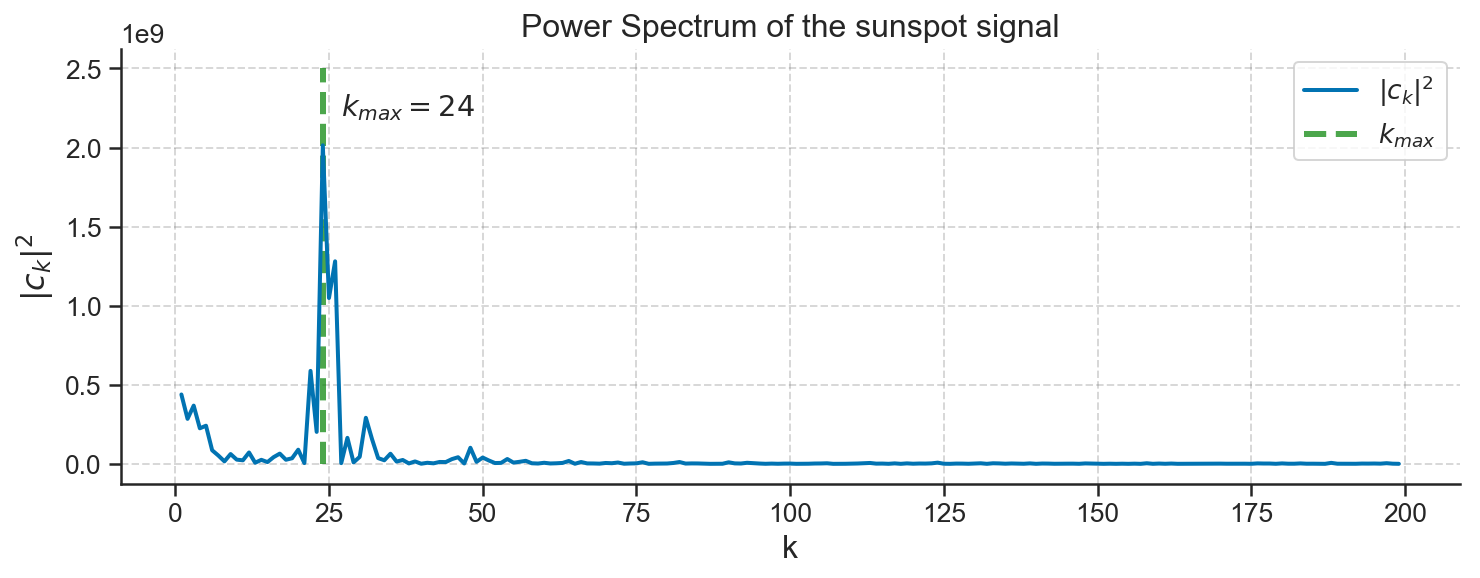

In [383]:
fig = plt.figure(figsize=(12,4))

ck2 = abs(fourier[1:200])**2
k_max = np.argmax(abs(fourier[1:200])**2) + 1
print(r"k at first peak in $|c_k|^2$ at k =", k_max)
plt.grid(color='gray', linestyle='--', linewidth=1, alpha = 0.3)
plt.plot(sun_data[1:200,0], ck2, label = r"$|c_k|^2$", linewidth = 2)
plt.vlines(k_max, 0, 2.5e9, color = 'green', linewidth = 3, alpha = 0.7, label = r'$k_{max}$', linestyle = "--")
plt.xlabel("k", fontsize = 16)
plt.ylabel(r"$|c_k|^2$", fontsize = 16)
plt.title("Power Spectrum of the sunspot signal", fontsize = 16)
plt.text(x=27, y =2.2e9, s=r"$k_{max} = 24$")
plt.legend(loc='best')
sns.despine()
plt.savefig("figs/SunspotPowerSpectrum.pdf")

#### 7.2 c)  Find the approximate argmax of the the power spectrum and calculate the period of the sine wave with that value of $k$.

The argmax (k corresponding to the peak) of the power spectrum is $k=24$. The period of the sinewave of associated with the coefficient is $b = \frac{2*\pi * k }{N}$ for $\sin(bx)$ is given by 
$$ T = \frac{2\pi}{b} = \frac{2\pi}{2 \pi \frac{k}{N}} = \frac{N}{k}$$

In [384]:
fourier_period_estimate = N_samples / k_max

print("Period of sine wave oscillation given by the fourier coefficients:", fourier_period_estimate)

Period of sine wave oscillation given by the fourier coefficients: 130.95833333333334


The estimate is $\approx$ 130.958 months.



----------

#### 7.7 a) Compute the FFT of the pitch.txt dataset

In [17]:
pitch_data = np.loadtxt("data/pitch.txt")
print(pitch_data.shape)

(1024,)


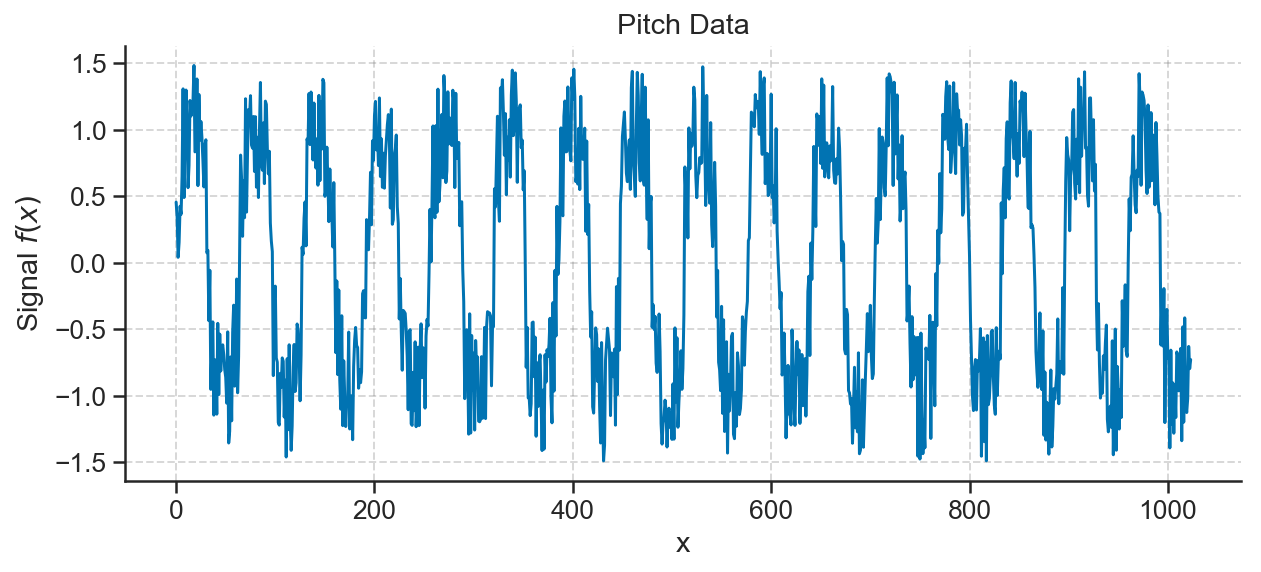

In [345]:
fig = plt.figure(figsize=(10,4))
plt.plot((np.arange(pitch_data.shape[0])), pitch_data)
plt.xlabel("x")
plt.ylabel(r"Signal $f(x)$")
plt.grid(color='gray', linestyle='--', linewidth=1, alpha = 0.3)
plt.title("Pitch Data")
sns.despine()
plt.savefig("figs/PitchSignal.pdf")

In [316]:
pitch_fft = np.fft.fft(pitch_data)

/Users/michaelalbergo/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


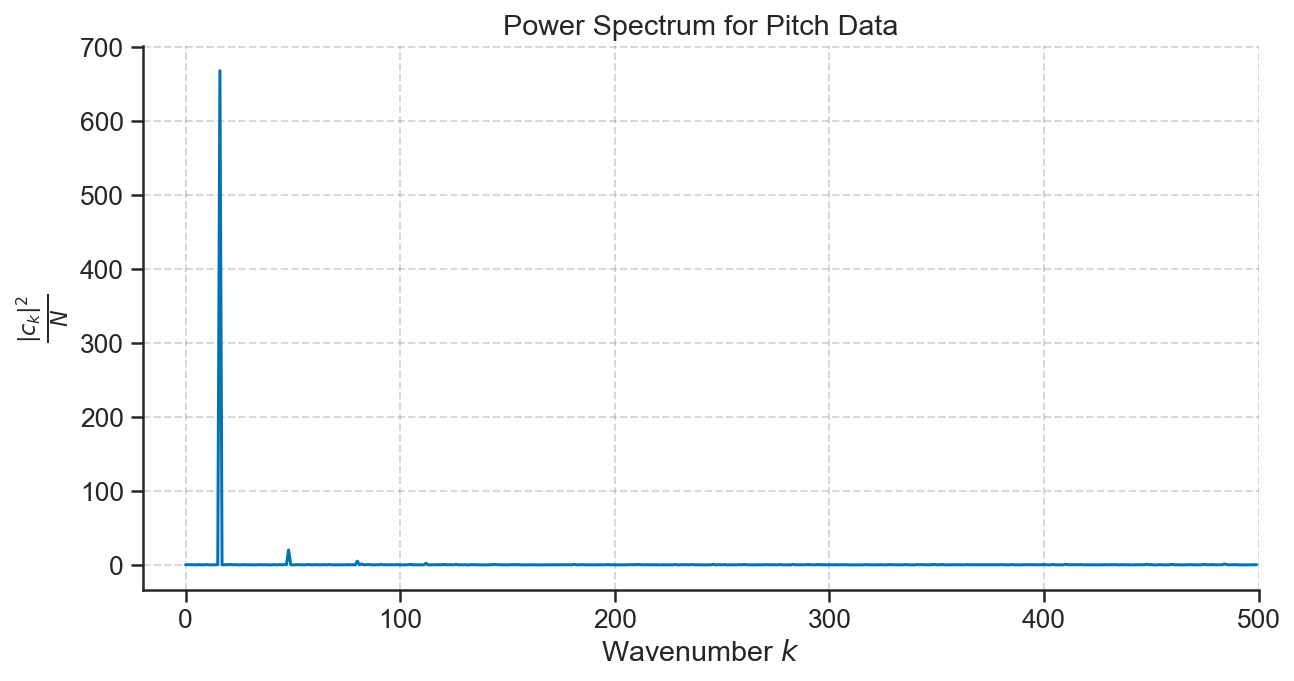

In [344]:
## must take complex conjugate when squaring

fig = plt.figure(figsize=(10,5))
plt.minorticks_off()
plt.grid(color='gray', linestyle='--', linewidth=1, alpha = 0.3)
#plt.tick_params(axis='y', direction="in", which="both")
plt.plot(np.arange(pitch_fft.shape[0])[:500], np.multiply(pitch_fft,np.conj(pitch_fft))[:500] / 500.0)
plt.xlabel(r"Wavenumber $k$")
plt.ylabel(r"$\frac{|c_k|^2}{N}$", fontsize = 16)

plt.title("Power Spectrum for Pitch Data")
sns.despine()
plt.xlim(-20,500)
plt.savefig("figs/PitchPowerSpectrum.pdf")

#### 7.9a) Read in the image as a 2D array and plot the density plot

In [22]:
blur_data = np.loadtxt("data/blur.txt")

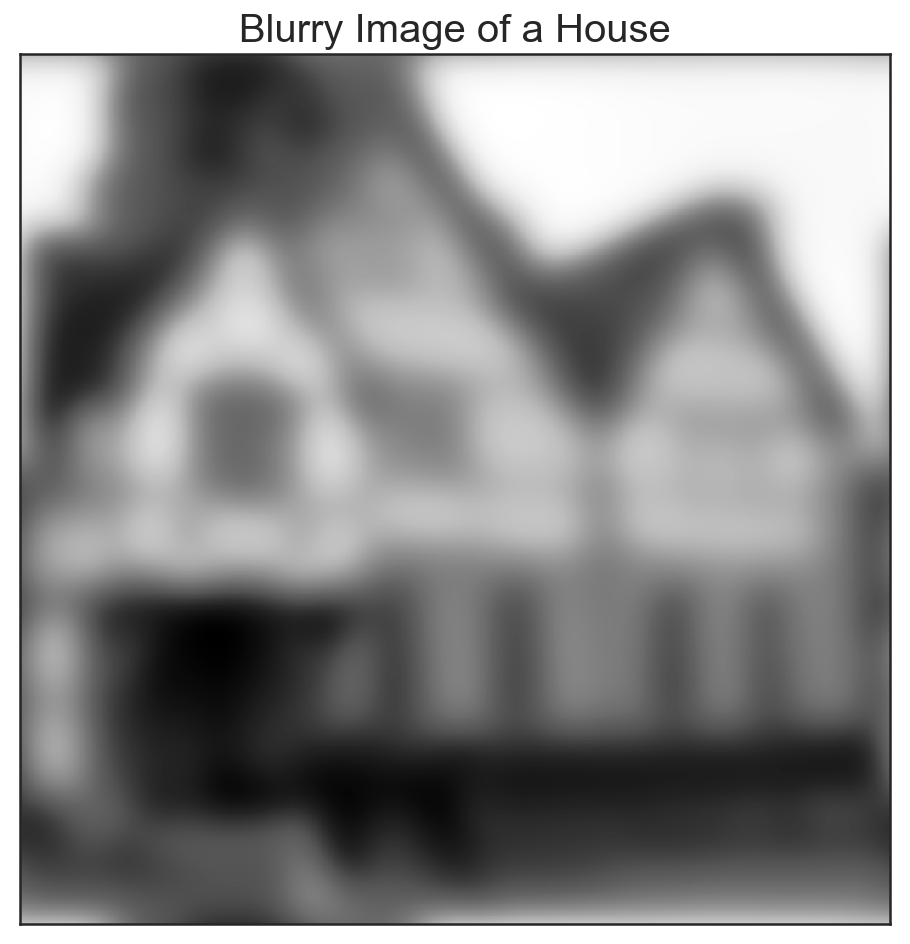

In [387]:
fig = plt.figure(figsize=(8,8))
plt.imshow(blur_data, cmap ="Greys_r")
plt.title("Blurry Image of a House", fontsize = 20)
#plt.tick_params(labelbottom=False, labelleft=False)
plt.yticks([])
plt.xticks([])
plt.savefig("figs/BlurryHouse.pdf")

#### 7.9b) Make a point spread function the size of the photo

In [118]:
xs = np.arange(0,1024,1)
ys = np.arange(0,1024,1)

xs1 = np.arange(0,1024,1)
ys1 = np.arange(0,1024,1)

In [178]:
def gaussian2d(xs, ys, L=1024, sig = 25):
    assert len(xs) == L
    xs, ys = np.meshgrid(xs,ys)
    shifts = [[0., 0.], [1024., 0.], [0.,1024.], [1024.,1024.]]
    gaus = np.zeros((L,L))
    for i in range(4):
        gaus += np.exp(-(((xs-shifts[i][0])**2 + (ys-shifts[i][1])**2)) / (2*sig**2) )
    return gaus
    
    

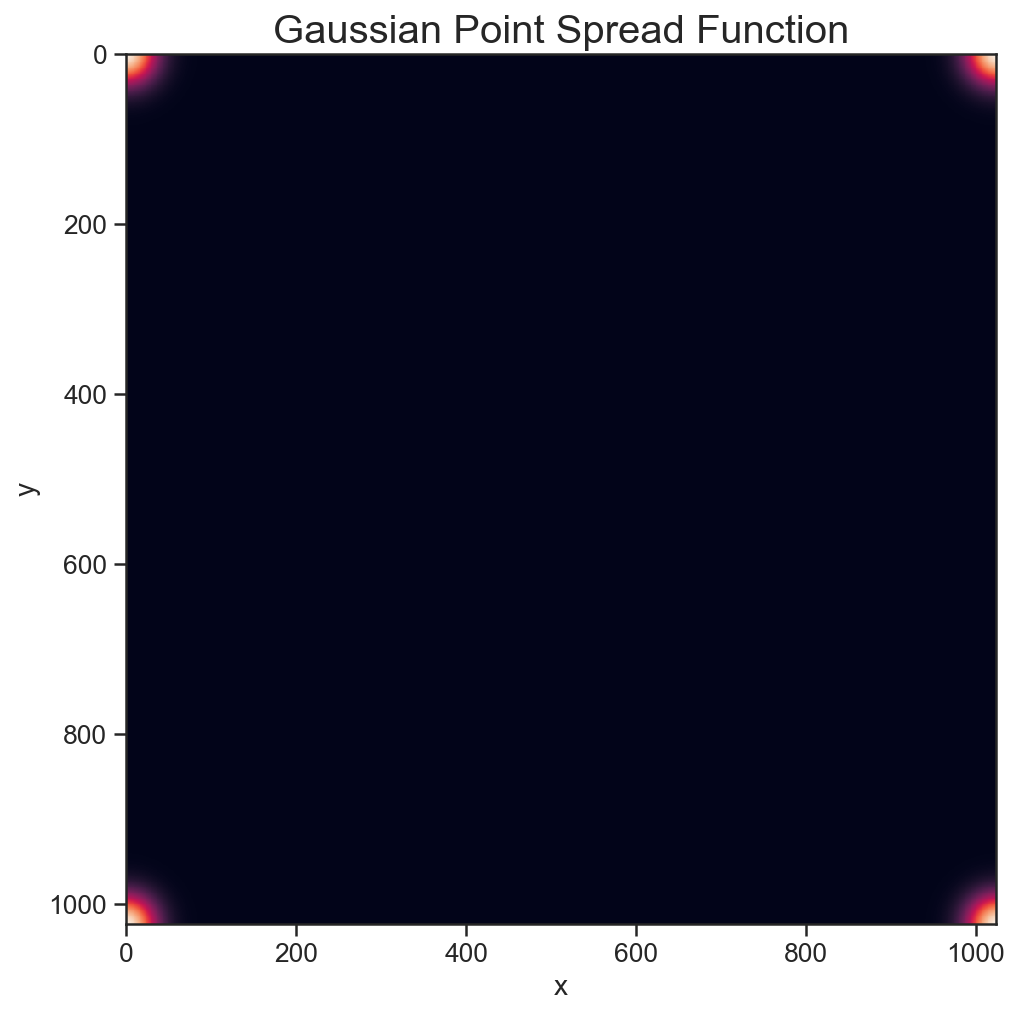

In [388]:
fig = plt.figure(figsize=(8,8))
plt.imshow(gaussian2d(xs,ys))
plt.title("Gaussian Point Spread Function", fontsize = 20)
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.savefig("figs/PointSpread.pdf")

#### 7.9c) Deconvolve

In [276]:
def deblur(filename, L=1024, sigma = 25, bias = .01):
    blur_data = np.loadtxt(filename)
    xs = np.arange(0,1024,1)
    ys = np.arange(0,1024,1)
    gaus = gaussian2d(xs, ys, L=L, sig = sigma)
    blur_fft = np.fft.rfft2(blur_data)
    gaus_fft = np.fft.rfft2(gaus) + bias
    div_fft = np.divide(blur_fft, gaus_fft, where=gaus_fft>=0.001)
    unblurred = np.fft.irfft2(div_fft)
    return unblurred

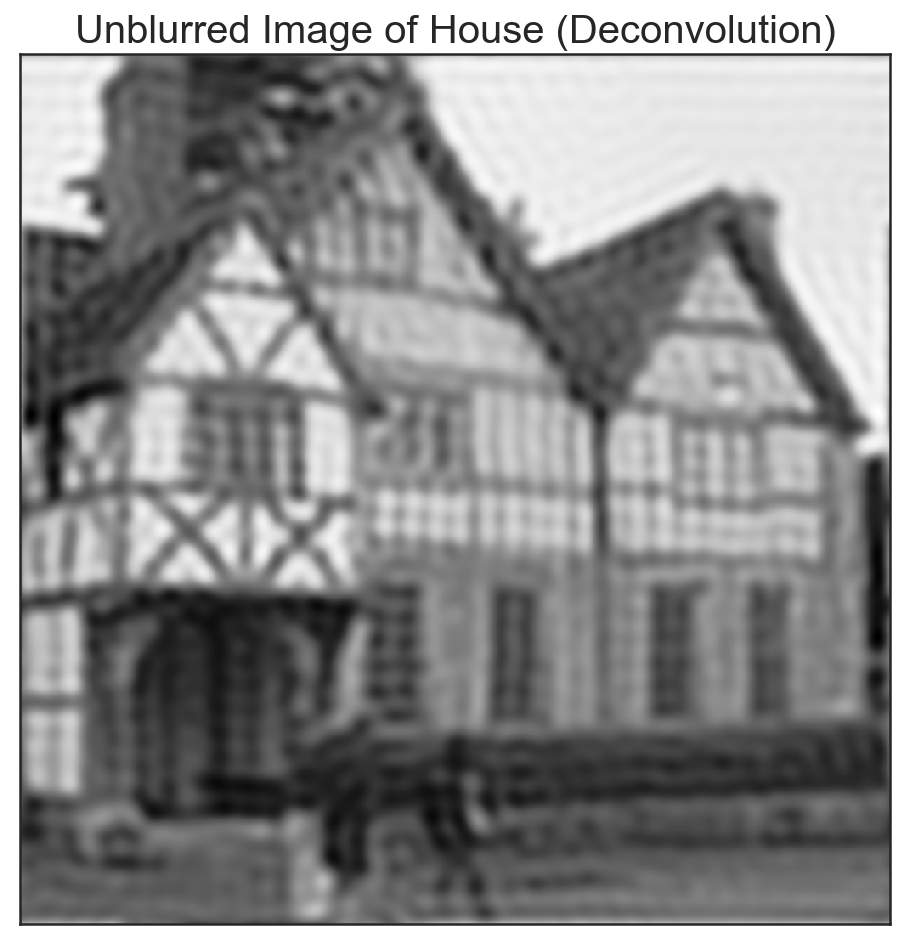

In [389]:
fig = plt.figure(figsize=(8,8))
deblurred_img_01 = deblur('data/blur.txt', bias = 0)
#plt.axis('off')
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(deblurred_img_01,cmap = 'Greys_r')
plt.title("Unblurred Image of House (Deconvolution)", fontsize = 20)
plt.yticks([])
plt.xticks([])
plt.savefig("figs/UnblurredHouse.pdf")
plt.show()